In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
jetblue_NY=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Fordham\Programming with Python (CISC-5380-L01)\intro_to_python_project\data\jetblue_NYairports_featureEngineering_df.csv')
jetblue_NY.head()

,searchDate,route,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,segmentsDepartureAirportCode,segmentsAirlineName,segmentsDurationInSeconds,segmentsCabinCode,departureTime,arrivalTime,departureCategory,arrivalCategory,daysLeft,numStops
0,2022-04-16,ATL|EWR,2022-04-17,ATL,EWR,PT2H9M,0,False,False,True,...,ATL,JetBlue Airways,7740,coach,07:30:00,09:39:00,Morning,Morning,1,0
1,2022-04-16,ATL|JFK,2022-04-17,ATL,JFK,PT2H15M,0,False,False,True,...,ATL,JetBlue Airways,8100,coach,09:00:00,11:15:00,Morning,Noon,1,0
2,2022-04-16,ATL|JFK,2022-04-17,ATL,JFK,PT2H23M,0,False,False,True,...,ATL,JetBlue Airways,8580,coach,18:50:00,21:13:00,Afternoon,Evening,1,0
3,2022-04-16,ATL|LGA,2022-04-17,ATL,LGA,PT2H16M,0,False,False,True,...,ATL,JetBlue Airways,8160,coach,12:03:00,14:19:00,Noon,Noon,1,0
4,2022-04-16,ATL|LGA,2022-04-17,ATL,LGA,PT2H19M,0,False,False,True,...,ATL,JetBlue Airways,8340,coach,10:40:00,12:59:00,Morning,Noon,1,0


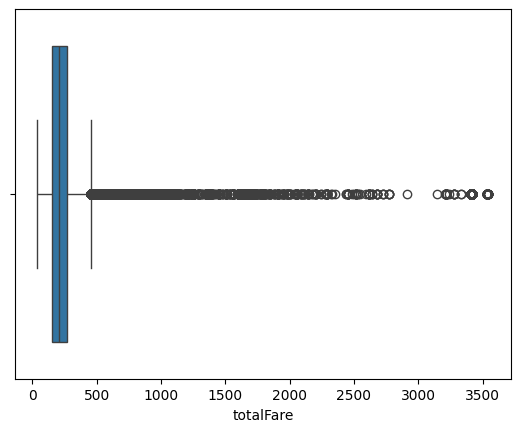

Q1: 148.60
Q3: 272.19
IQR: 123.59
Lower bound: -98.58, Upper bound: 519.37
Amount of outliers: 127,900, Amount of inliers: 3,821,580


In [25]:
# Boxplot
sns.boxplot(jetblue_NY, x='totalFare')
plt.show()

# Calculate bounds
q1, q3 = jetblue_NY['totalFare'].quantile([0.25, 0.75])
IQR = q3 - q1
lower_bound, upper_bound = q1 - 2 * IQR, q3 + 2 * IQR

# Print results
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {IQR:.2f}')
print(f'Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}')

# Identify and count outliers
outliers = jetblue_NY[(jetblue_NY['totalFare'] < lower_bound) | (jetblue_NY['totalFare'] > upper_bound)]
inliers=len(jetblue_NY) - outliers.shape[0]
print(f'Amount of outliers: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}')

count    3,949,480.00
mean           233.95
std            158.31
min             38.61
25%            148.60
50%            208.61
75%            272.19
max          3,544.35
Name: totalFare, dtype: object

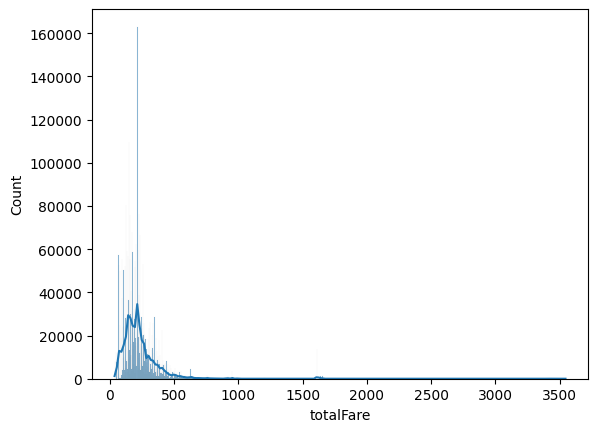

In [5]:
sns.histplot(jetblue_NY['totalFare'],kde=True)
jetblue_NY['totalFare'].describe().apply(lambda x: f'{x:,.2f}')

In [30]:
count_tickets_above1000=jetblue_NY[jetblue_NY['totalFare']>=1000].shape[0]
count_tickets_above1000
#There are 20,501 tickets are equal or more expensive than $1000

20501

In [ ]:
jetblue_NY_non_outliers=jetblue_NY[(jetblue_NY['totalFare']>=lower_bound)&(jetblue_NY['totalFare']<=upper_bound)]
jetblue_NY_non_outliers.shape


Our target variable has a right skewness.

Most of our price values in a range of under $1000.We can predict that these values contains alot of Economy class ,little of Businesss class.

In [6]:
count_tickets_above1000=jetblue_NY[jetblue_NY['totalFare']>=1500].shape[0]
count_tickets_above1000
#There are 20,501 tickets are equal or more expensive than $1000
#

19518

In [7]:
jetblue_NY_non_outliers=jetblue_NY[(jetblue_NY['totalFare']<=1500)]
jetblue_NY_non_outliers.shape

(3929962, 27)

In [8]:
# Get the current working directory
cwd = os.getcwd()
jetblue_NY_non_outliers=jetblue_NY_non_outliers.to_csv('jetblue_NY_3', index=False)

file_path = os.path.join(cwd,'jetblue_NY_3')
print("File saved at:", file_path)

File saved at: c:\Users\User\OneDrive\Desktop\Fordham\Programming with Python (CISC-5380-L01)\intro_to_python_project\src\jetblue_NY_3


## Plotting

In [12]:
jetblue_NY_3=pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Fordham\Programming with Python (CISC-5380-L01)\intro_to_python_project\data\Jetblue_NY_3")
jetblue_NY_3.shape

(3929962, 27)

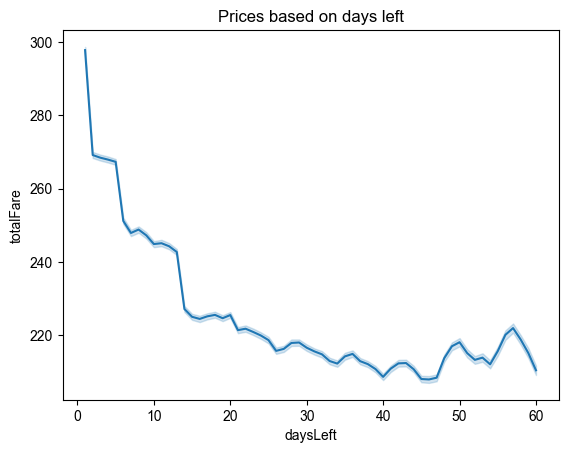

In [10]:
#price vs daysleft
sns.lineplot(jetblue_NY,x='daysLeft', y='totalFare').set(title='Prices based on days left')
sns.set_theme(style='whitegrid')


The graph highlights how the prices rise slowly 45 days before the flight and then drastically start rising 15 days before the flight. this indicates that airlines are starting to raise prices as the flight fills up and fewer seats remain.

Between approximately earlier than 45 days to 60 days, the price is highly fluctuate, but still under $240

The overall trend suggests that the best time to purchase tickets is well in advance (between 20-45 days, avoiding the fluctuation between earlier than 45 days and 60 days), as prices tend to be lower during this period.

**How the Ticket Price change based on the Departure Time and Arrival Time**

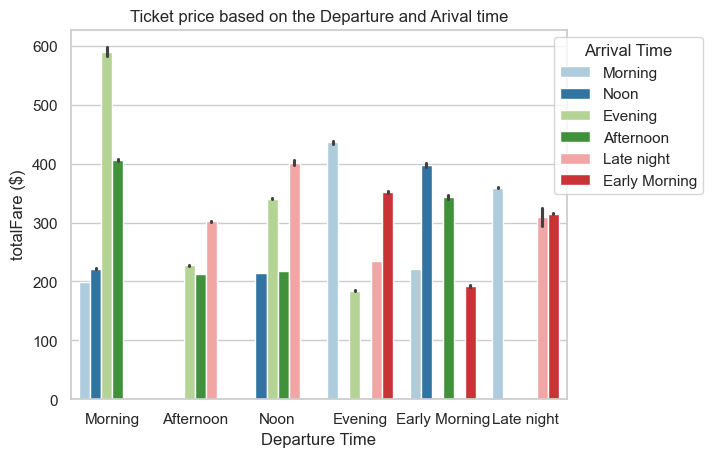

In [7]:
sns.barplot(jetblue_NY,x='departureCategory', y='totalFare', hue='arrivalCategory', palette='Paired').set(title='Ticket price based on the Departure and Arival time', xlabel='Departure Time',ylabel = 'totalFare ($)')
plt.legend(title='Arrival Time', bbox_to_anchor=(1.29, 1), loc='upper right')
sns.set_style('whitegrid')